# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [86]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [87]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

<Figure size 1600x640 with 0 Axes>

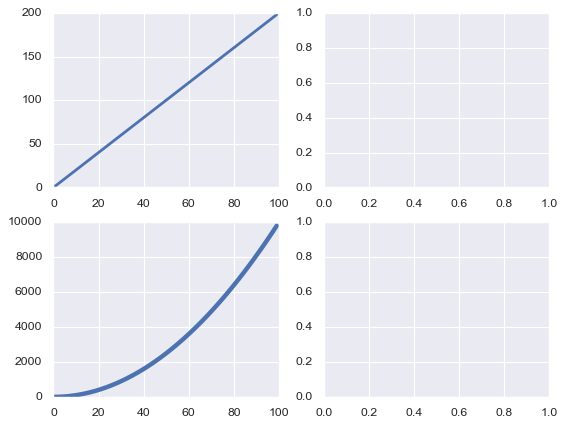

In [88]:
# Method 1
plt.figure(figsize=(20,8))
fig, axes =plt.subplots(nrows=2, ncols=2, )
axes[0, 0].plot(x, y, linewidth=2.5)
axes[1, 0].plot(x,z, linewidth=4)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

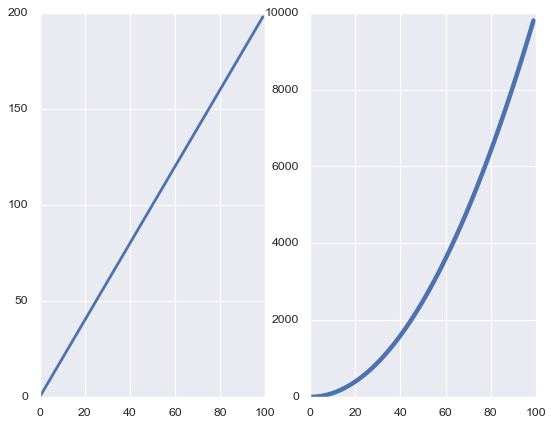

In [89]:
# Method 2
fig, axes =plt.subplots(nrows=1, ncols=2, )
axes[0].plot(x, y, linewidth=2.5)
axes[1].plot(x,z, linewidth=4)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

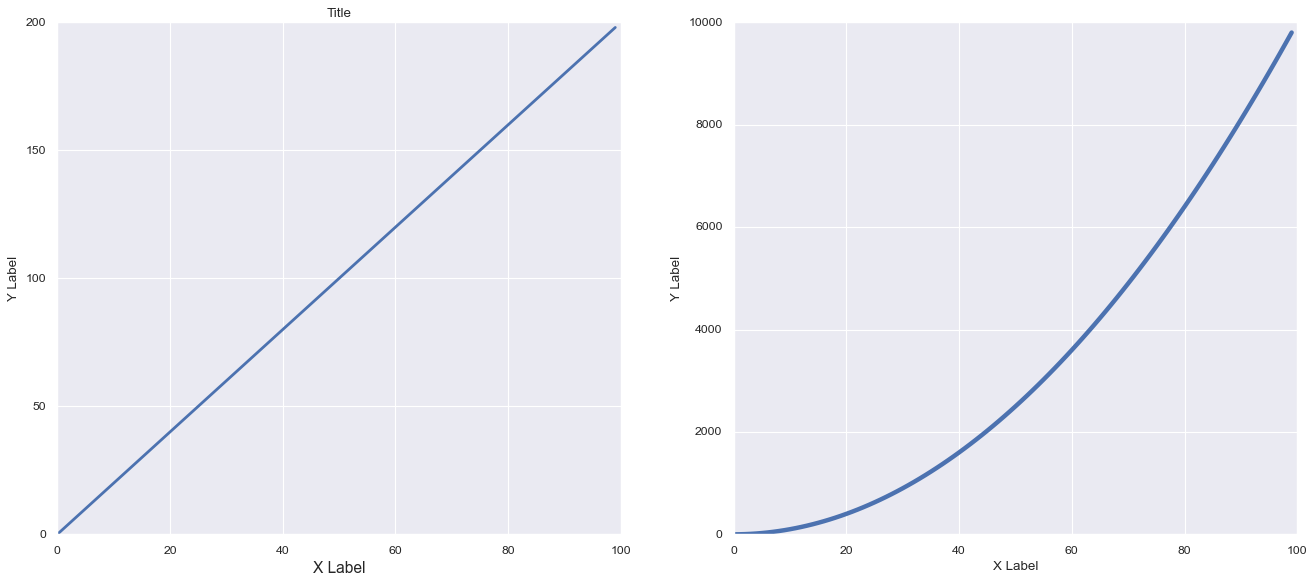

In [90]:
# your code here
fig, axes =plt.subplots(nrows=1, ncols=2,figsize=(20,8))
axes[0].plot(x, y, linewidth=2.5)
axes[1].plot(x,z, linewidth=4)
axes[0].set_xlabel('X Label',fontdict={'fontname': 'Arial', 'fontsize': 14})
axes[0].set_ylabel('Y Label')
axes[1].set_xlabel('X Label')
axes[1].set_ylabel('Y Label')
axes[0].set_title('Title')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

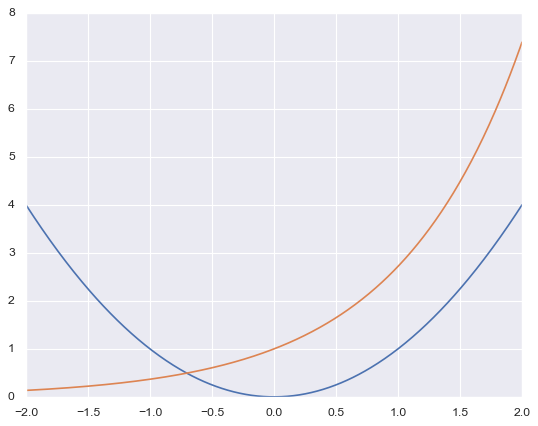

In [91]:
# your code here
x = np.linspace(-2, 2, 500)
y = x**2
y2 = np.exp(x)

plt.plot(x,y, label=r'$y=x^2$')
plt.plot(x,y2, label=r'$y=e^x$' )

#### As a bonus challenge, try to add a legend to the plot.

Text(0.5, 1.0, 'Plot')

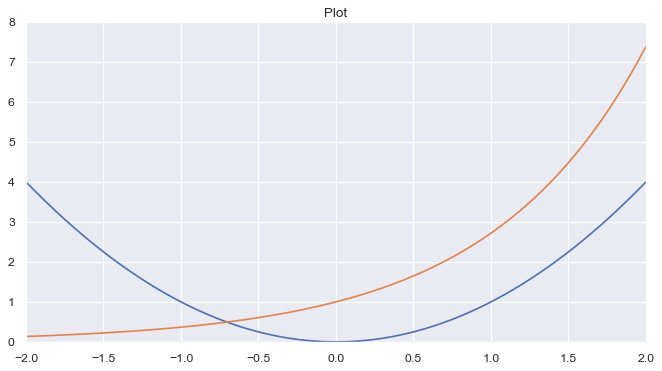

In [92]:
# your code here
x = np.linspace(-2, 2, 500)
y = x**2
y2 = np.exp(x)

fig, axis = plt.subplots(1, 1, figsize=(10, 5))
axis.plot(x,y, label=r'$y=x^2$')
axis.plot(x,y2, label=r'$y=e^x$' )
axis.set_title('Plot')


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [93]:
# your code here
fitbit2 = pd.read_csv("Fitbit2.csv")
fitbit2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

([<matplotlib.axis.XTick at 0x1ceb169aad0>,
 [Text(0, 0, 'Work'), Text(1, 0, 'Weekend')])

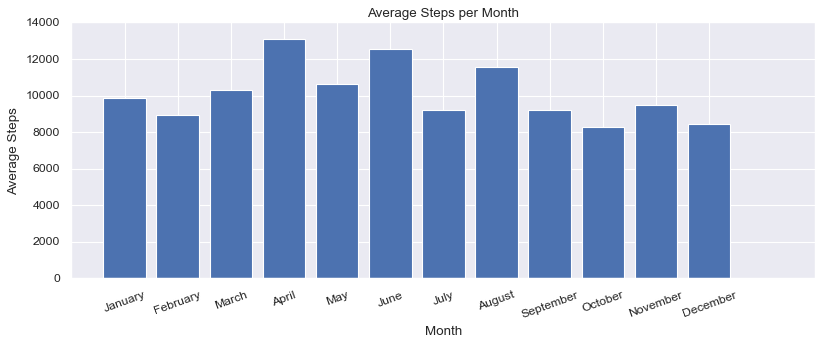

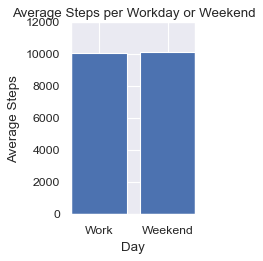

In [94]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_month = fitbit2.groupby("Months_encoded").agg({"Steps": ["mean"]})
steps_month = steps_month.reset_index()
x = steps_month["Months_encoded"]
y = steps_month["Steps"]["mean"]
fig, axis = plt.subplots(figsize=(12, 4))
axis.bar(x, y)
axis.set_xlabel("Month")
axis.set_ylabel("Average Steps")
axis.set_title("Average Steps per Month")
plt.xticks(x, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=20)


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_work = fitbit2.groupby("Work_or_Weekend").agg({"Steps": ["mean"]})
steps_work = steps_work.reset_index()
a = steps_work["Work_or_Weekend"]
b = steps_work["Steps"]["mean"]
fig, axis1 = plt.subplots(figsize=(2,3))
axis1.bar(a, b)
axis1.set_xlabel("Day")
axis1.set_ylabel("Average Steps")
axis1.set_title("Average Steps per Workday or Weekend")
plt.xticks(a,["Work","Weekend"])

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

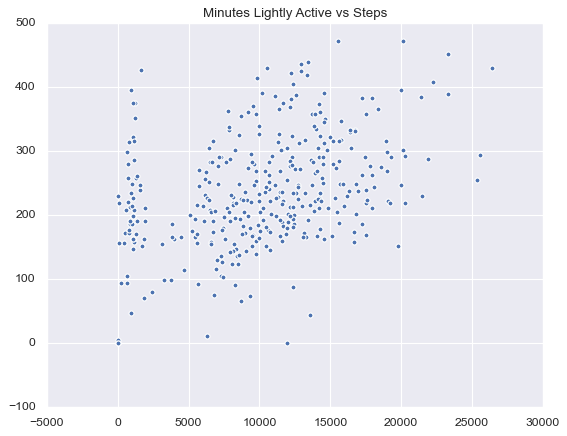

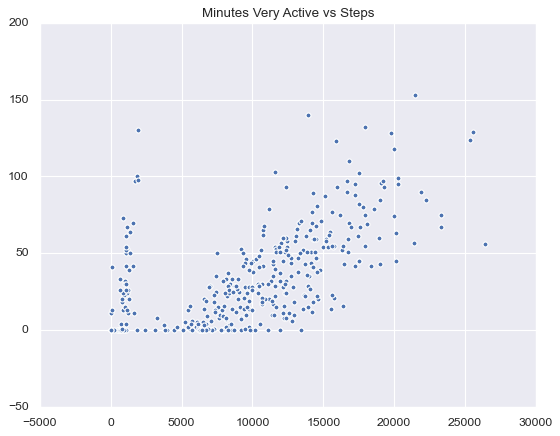

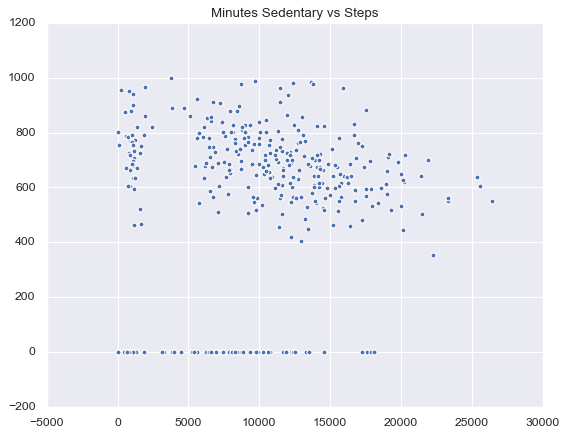

In [95]:
# your code here
versus = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]
x = fitbit2["Steps"]

for item in versus:
    plt.scatter(x,fitbit2[item])
    plt.title(f"{item} vs Steps")
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [96]:
# your code here
titanic = pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [97]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [98]:
# NUMERICAL VARIABLES
# your code here
display(titanic.select_dtypes(int))
titanic.select_dtypes(float)

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [99]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

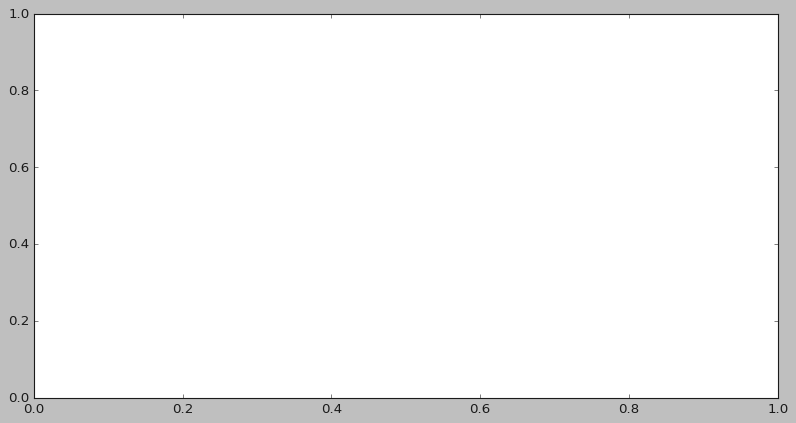

In [100]:
# your code here
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(12,6))

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

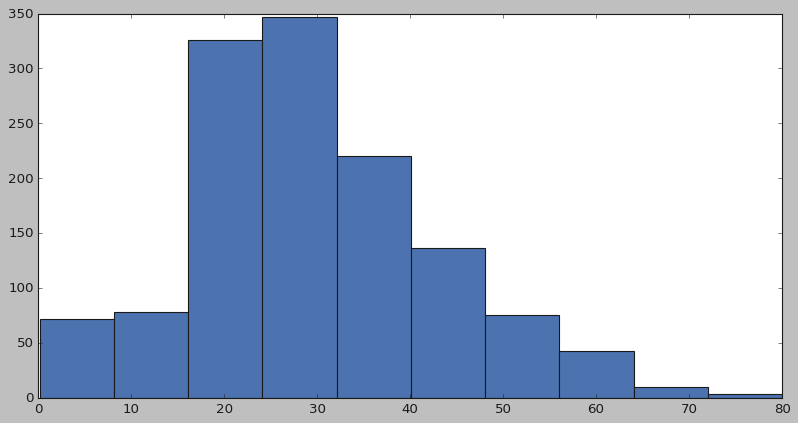

In [101]:
# your code here

plt.style.use('classic')
fig, axis = plt.subplots(figsize=(12,6))
axis.hist(titanic["Age"])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 85., 162., 963.]),
 array([ 0., 10., 20., 50.]),
 <BarContainer object of 3 artists>)

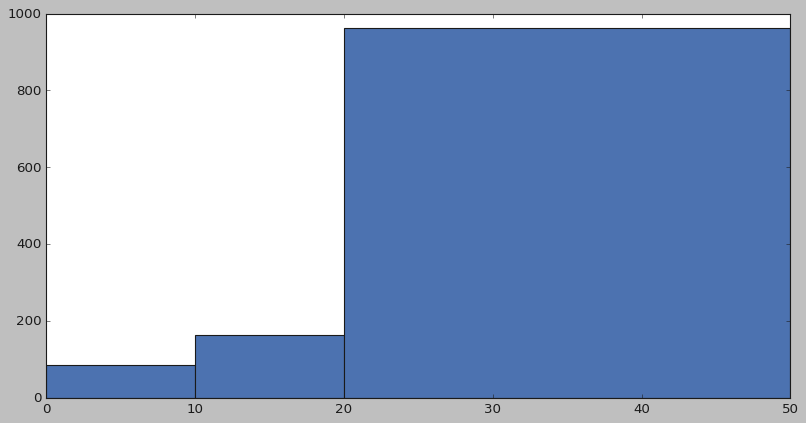

In [102]:
# your code here
plt.style.use('classic')
fig, axis = plt.subplots(figsize=(12,6))
axis.hist(titanic["Age"], bins= [0,10,20,50])

#### How does the bin size affect your plot?

In [103]:
"""
It changes the vizualization of our data, by changing the distribution of the ages, on the second chart we only get that the most common age is above 20 years, on the first it is more precise wich age is the most common.
"""

'\nIt changes the vizualization of our data, by changing the distribution of the ages, on the second chart we only get that the most common age is above 20 years, on the first it is more precise wich age is the most common.\n'

#### Use seaborn to show the distribution of column `Age`.

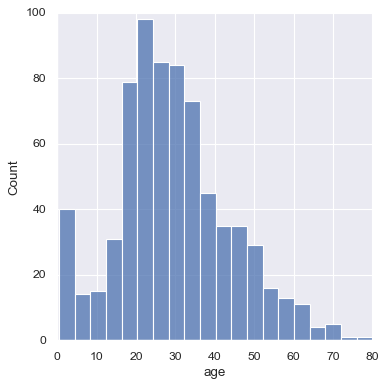

In [104]:
# your code here
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("titanic")

# Create a visualization
sns.displot(
    data=tips,
    x="age"
)


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

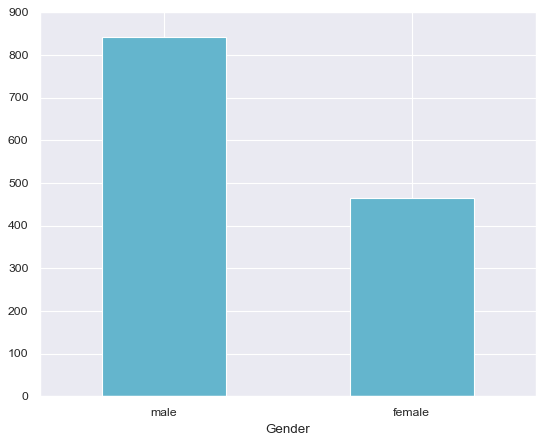

In [105]:
# Method 1 - matplotlib
# your code here
gender = titanic['Gender'].value_counts()
ax = gender.plot(kind='bar', rot=0, color="c")

<Axes: xlabel='sex', ylabel='count'>

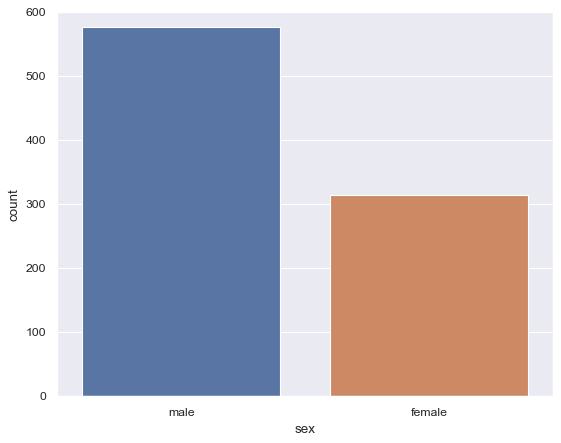

In [106]:
# Method 2 - seaborn
# your code here
tips = sns.load_dataset("titanic")
sns.countplot(x=tips["sex"])

#### Use the right plot to visualize the column `Pclass`.

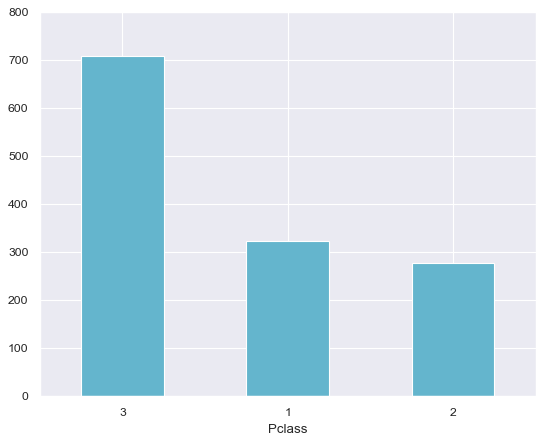

In [107]:
# your code here
gender = titanic['Pclass'].value_counts()
ax = gender.plot(kind='bar', rot=0, color="c")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ceb353bc90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ceb354cd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ceb353b350>],
 'medians': [<matplotlib.lines.Line2D at 0x1ceb354ded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ceb350e750>],
 'means': []}

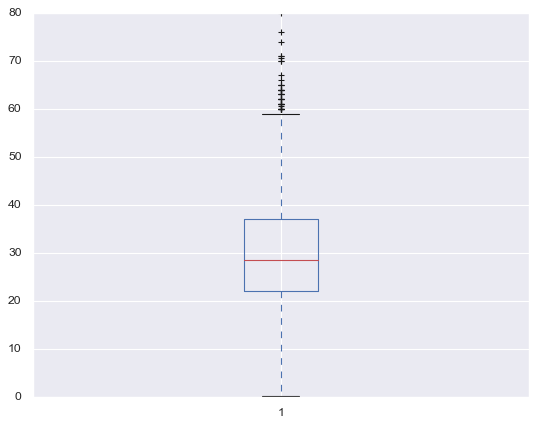

In [108]:
# your code here
plt.boxplot(titanic['Age'])

In [109]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [110]:
"""
The median age is around 30 and the minimum age is around 0 and the maximum age is around 80
"""

'\nThe median age is around 30 and the minimum age is around 0 and the maximum age is around 80\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age'>

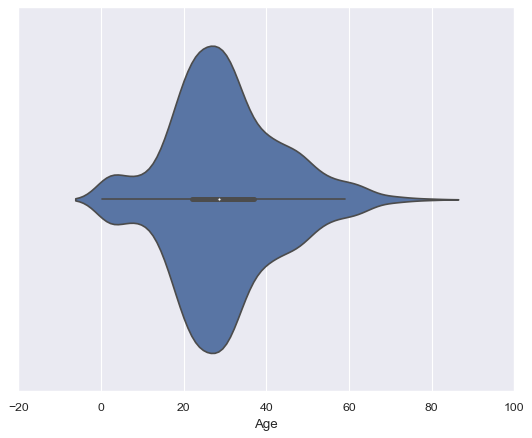

In [111]:
# your code here
# your code here
sns.violinplot(x=titanic['Age'])


#### What additional information does the last plot provide about feature `Age`?

In [112]:
"""
We can compara the distribuiton of the age with the summary statistics
"""

'\nWe can compara the distribuiton of the age with the summary statistics\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

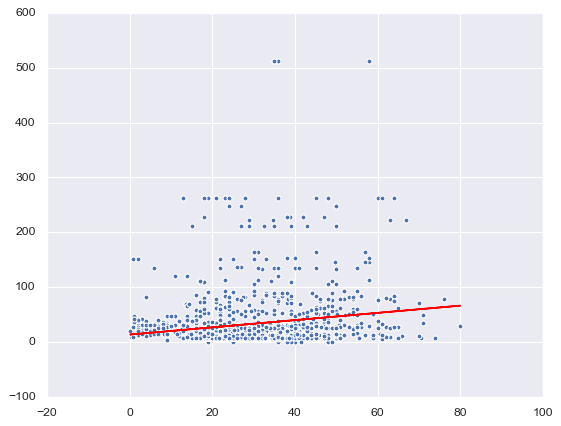

In [113]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic["Age"],titanic["Fare"])
m, b = np.polyfit(titanic["Age"], titanic["Fare"], 1)
plt.plot(titanic["Age"], m*titanic["Age"] + b, color='red')



<Axes: xlabel='age', ylabel='fare'>

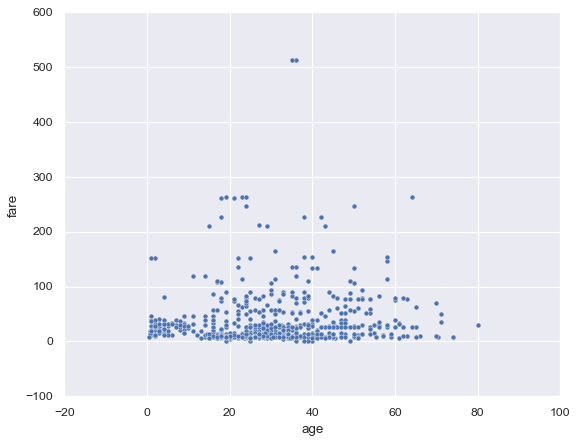

In [114]:
# Method 2 - seaborn
# your code here

sns.scatterplot(data=tips, x="age", y="fare")



#### Plot the correlation matrix using seaborn.

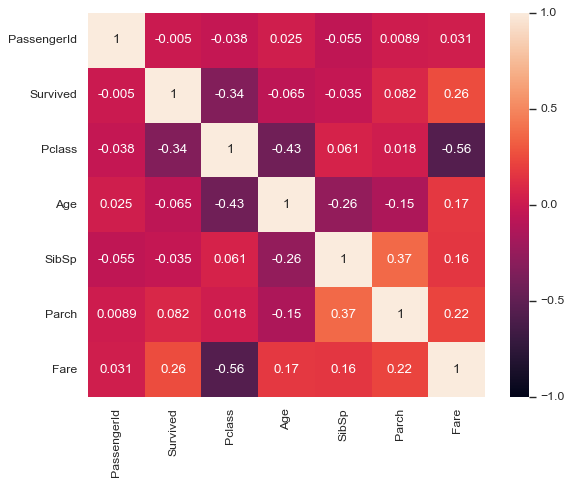

In [115]:
# your code here

correlation_titanic = titanic.select_dtypes(include=np.number)

heatmap = sns.heatmap(correlation_titanic.corr(), vmin=-1, vmax=1, annot=True)

#### What are the most correlated features?

In [116]:
"""
SibSp and Parch
"""

'\nSibSp and Parch\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Pclass', ylabel='Age'>

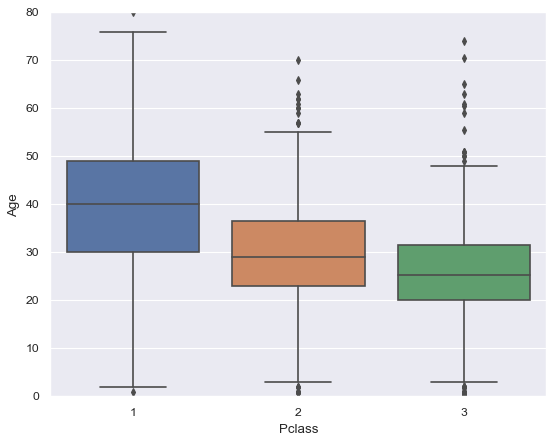

In [117]:
# your code here
sns.boxplot(x =titanic['Pclass'],
            y = titanic['Age'],
            )

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

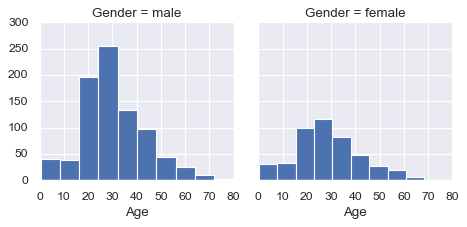

In [124]:
graph = sns.FacetGrid(titanic, col ="Gender")
graph.map(plt.hist, "Age", bins = 10 )
plt.show()